In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

**PROBLEM STATEMENT** : Build a decision tree classifier to predict whether a customer will purchase a product or service based on their
demographic and behavioral data. Use a dataset such as the
Bank Marketing dataset from the UCI Machine Learning
Repository.

In [ ]:
df = pd.read_csv('/content/bank.csv',sep=';')

In [ ]:
df = pd.DataFrame(df)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df['y'].value_counts()

,count
y,
no,4000
yes,521


In [ ]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df, drop_first=True)

# Encode target variable
data_encoded['y'] = df['y'].map({'yes': 1, 'no': 0})



In [ ]:
no = data_encoded[data_encoded['y']==0]
yes = data_encoded[data_encoded['y']==1]

In [ ]:
print(no.shape)
print(yes.shape)

(4000, 44)
(521, 44)


In [ ]:
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,y
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,True,False,0
1,33,4789,11,220,1,339,4,False,False,False,...,False,True,False,False,False,False,False,False,False,0
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,30,1476,3,199,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,False,0
4,59,0,5,226,1,-1,0,True,False,False,...,False,True,False,False,False,False,False,True,False,0


In [ ]:
data_encoded.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [ ]:
no.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0
mean,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250,0.0
std,10.188398,3075.349313,8.249736,210.313631,3.212609,96.297657,1.627371,0.0
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.0
25%,33.000000,61.000000,8.000000,96.000000,1.000000,-1.000000,0.000000,0.0
50%,39.000000,419.500000,16.000000,167.000000,2.000000,-1.000000,0.000000,0.0
75%,48.000000,1407.000000,21.000000,283.000000,3.000000,-1.000000,0.000000,0.0
max,86.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,0.0


In [ ]:
yes.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.0
mean,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211,1.0
std,13.115772,2444.398956,8.235148,390.325805,2.092071,121.963063,2.055368,0.0
min,19.000000,-1206.000000,1.000000,30.000000,1.000000,-1.000000,0.000000,1.0
25%,32.000000,171.000000,9.000000,260.000000,1.000000,-1.000000,0.000000,1.0
50%,40.000000,710.000000,15.000000,442.000000,2.000000,-1.000000,0.000000,1.0
75%,50.000000,2160.000000,22.000000,755.000000,3.000000,98.000000,2.000000,1.0
max,87.000000,26965.000000,31.000000,2769.000000,24.000000,804.000000,14.000000,1.0


In [ ]:
data_encoded.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
y,,,,,,,,,,,,,,,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250,0.219250,0.038250,0.024500,...,0.119000,0.007000,0.326250,0.087500,0.010750,0.00875,0.039750,0.011500,0.842000,0.0
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211,0.132438,0.028791,0.026871,...,0.105566,0.040307,0.178503,0.074856,0.071017,0.03263,0.072937,0.159309,0.646833,1.0


In [ ]:
# Split data into features (X) and target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))


[[801   0]
 [  0 104]]


In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)


In [ ]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predictions = dtree.predict(X_test)


In [ ]:
predictions


array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       801
           1       1.00      1.00      1.00       104

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



In [ ]:
print(confusion_matrix(y_test,predictions))


[[801   0]
 [  0 104]]


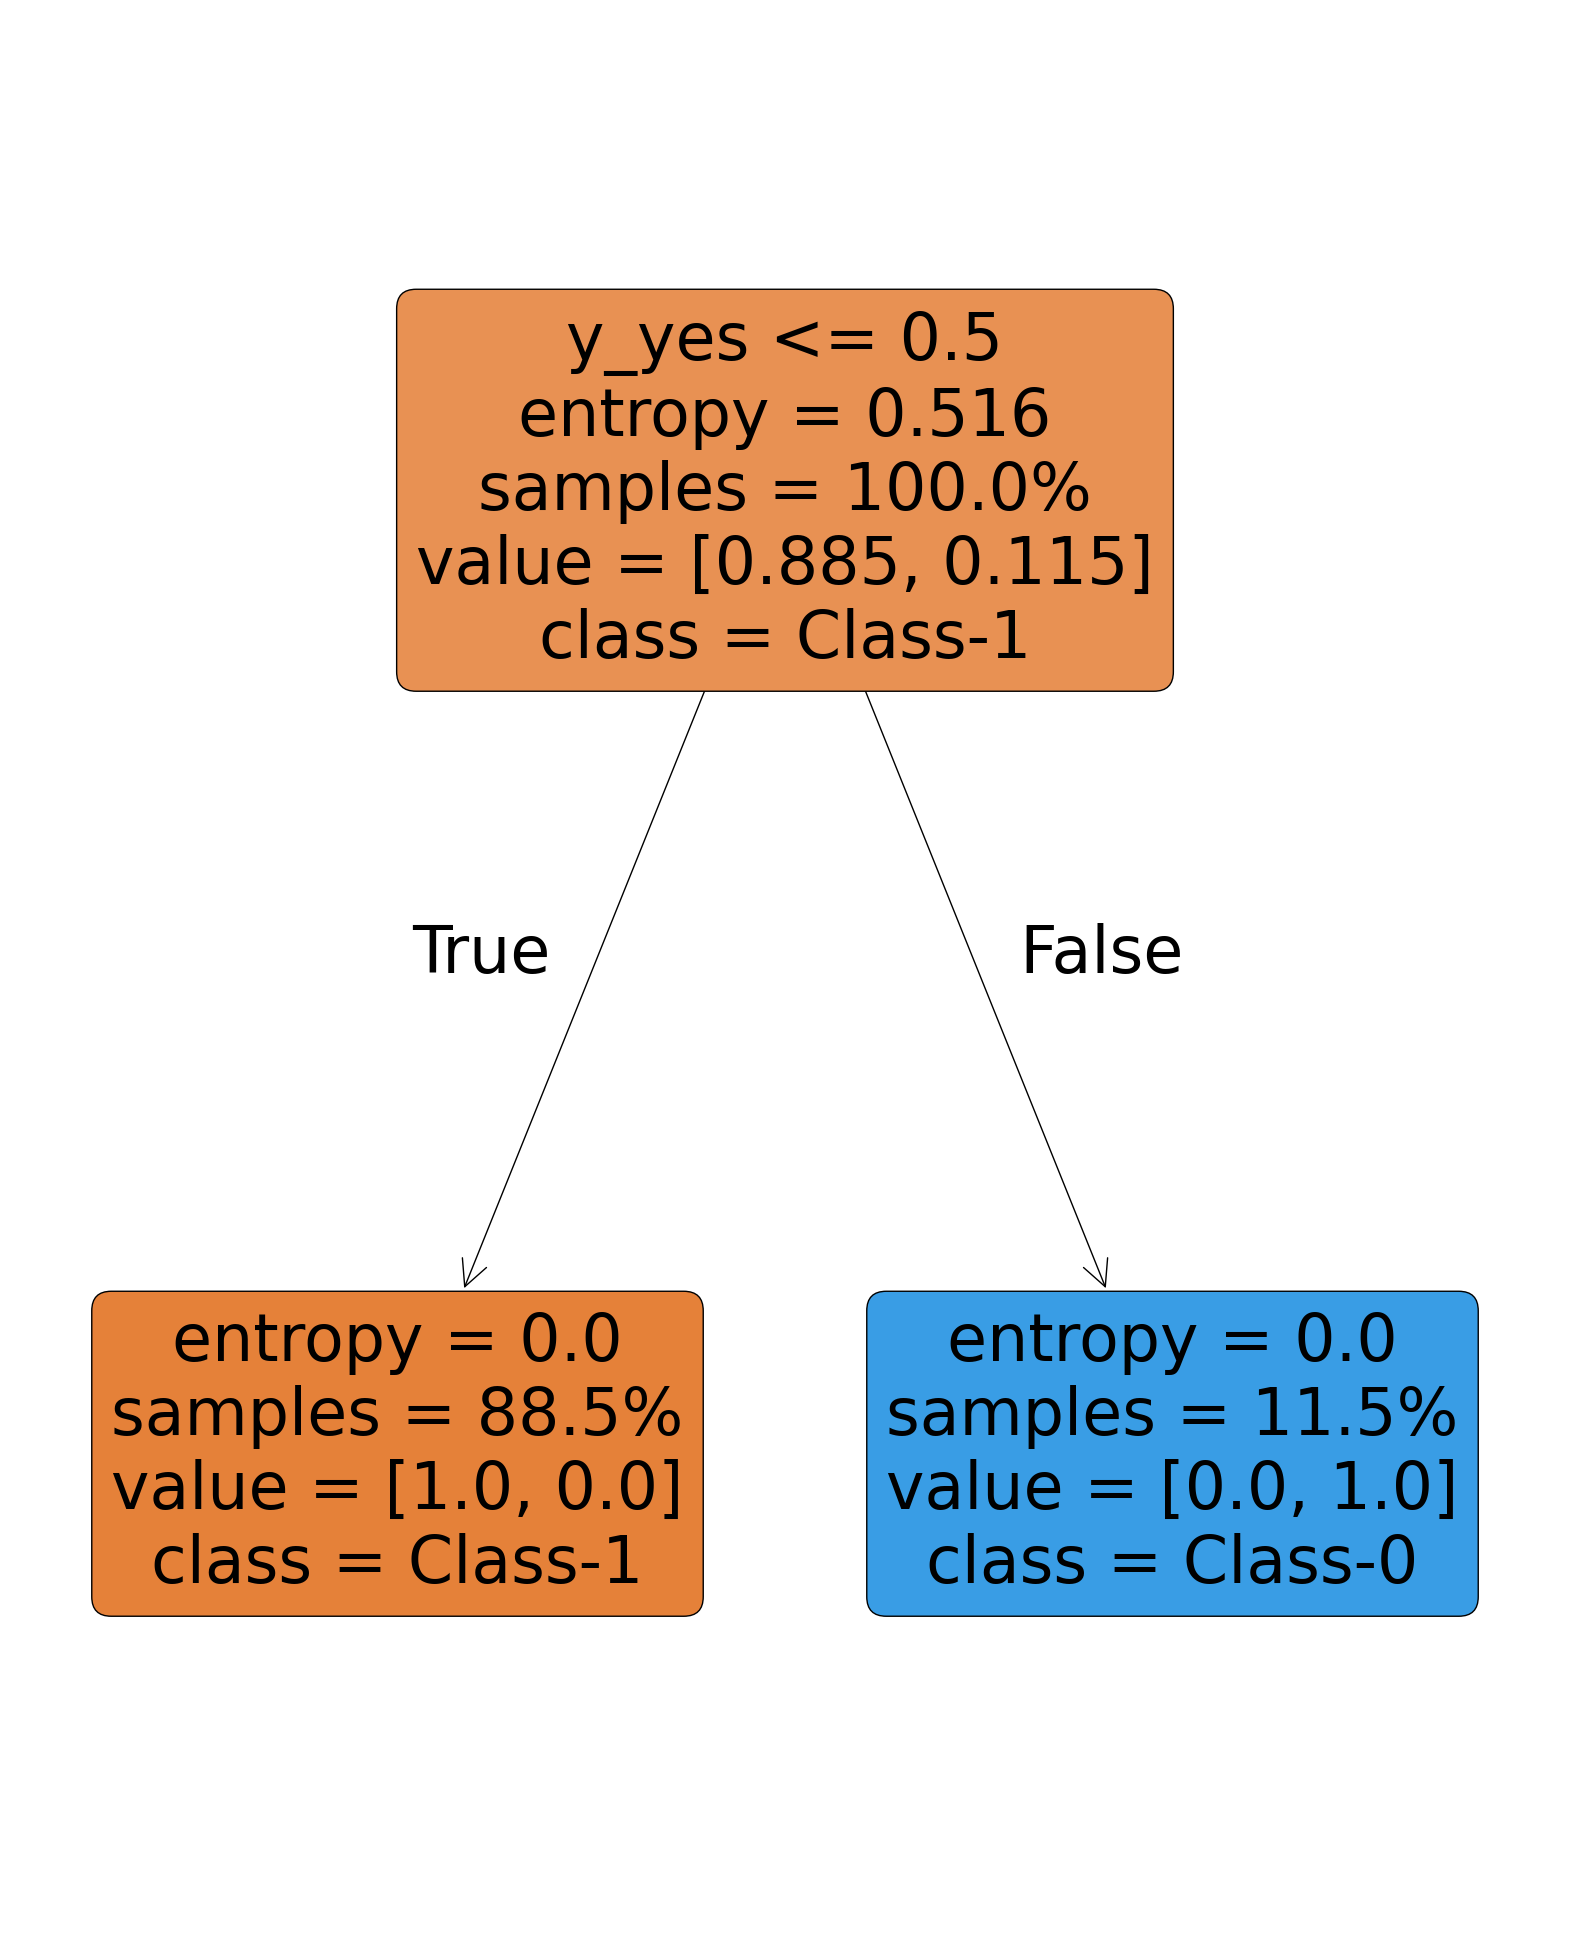

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(dtree,feature_names=X.columns,class_names=['Class-1', 'Class-0'],rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True
        )
plt.show()